<a href="https://colab.research.google.com/github/Thanmayee28/titanic/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Libraries**

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# **Load the Data into a Pandas Dataframe**

In [9]:
data = pd.read_csv('/content/tested.csv')

In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
data['Pclass'].unique()

array([3, 2, 1])

# **Preprocessing the Dataset**

In [12]:
columns_to_drop = ['PassengerId','Name','Ticket','Cabin','Embarked']
data.drop(columns=columns_to_drop, inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,34.5,0,0,7.8292
1,1,3,female,47.0,1,0,7.0000
2,0,2,male,62.0,0,0,9.6875
3,0,3,male,27.0,0,0,8.6625
4,1,3,female,22.0,1,1,12.2875


In [13]:
numerical_columns = ['Age', 'SibSp', 'Parch', 'Fare']
data[numerical_columns] = (data[numerical_columns] - data[numerical_columns].min()) / (data[numerical_columns].max() - data[numerical_columns].min())


In [14]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,0.452723,0.000,0.000000,0.015282
1,1,3,female,0.617566,0.125,0.000000,0.013663
2,0,2,male,0.815377,0.000,0.000000,0.018909
3,0,3,male,0.353818,0.000,0.000000,0.016908
4,1,3,female,0.287881,0.125,0.111111,0.023984


In [15]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [16]:
Label_encoder = LabelEncoder()
data['Sex'] = Label_encoder.fit_transform(data['Sex'])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,0.452723,0.000,0.000000,0.015282
1,1,3,0,0.617566,0.125,0.000000,0.013663
2,0,2,1,0.815377,0.000,0.000000,0.018909
3,0,3,1,0.353818,0.000,0.000000,0.016908
4,1,3,0,0.287881,0.125,0.111111,0.023984


In [17]:
rows_before = data.shape[0]
print("Number of rows before dropping:", rows_before)
data.dropna(inplace=True)
rows_after = data.shape[0]
print("Number of rows after dropping:", rows_after)
data.head()

Number of rows before dropping: 418
Number of rows after dropping: 331


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,0.452723,0.000,0.000000,0.015282
1,1,3,0,0.617566,0.125,0.000000,0.013663
2,0,2,1,0.815377,0.000,0.000000,0.018909
3,0,3,1,0.353818,0.000,0.000000,0.016908
4,1,3,0,0.287881,0.125,0.111111,0.023984


In [18]:
rows_before = data.shape[0]
print("Number of rows before dropping:", rows_before)
data.dropna(inplace=True)
rows_after = data.shape[0]
print("Number of rows after dropping:", rows_after)
data.head()

Number of rows before dropping: 331
Number of rows after dropping: 331


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,0.452723,0.000,0.000000,0.015282
1,1,3,0,0.617566,0.125,0.000000,0.013663
2,0,2,1,0.815377,0.000,0.000000,0.018909
3,0,3,1,0.353818,0.000,0.000000,0.016908
4,1,3,0,0.287881,0.125,0.111111,0.023984


In [19]:
x = data.drop('Survived', axis=1)
y = data['Survived']

In [20]:
print(x)

     Pclass  Sex       Age  SibSp     Parch      Fare
0         3    1  0.452723  0.000  0.000000  0.015282
1         3    0  0.617566  0.125  0.000000  0.013663
2         2    1  0.815377  0.000  0.000000  0.018909
3         3    1  0.353818  0.000  0.000000  0.016908
4         3    0  0.287881  0.125  0.111111  0.023984
..      ...  ...       ...    ...       ...       ...
409       3    0  0.037320  0.125  0.111111  0.026887
411       1    0  0.485692  0.125  0.000000  0.175668
412       3    0  0.367005  0.000  0.000000  0.015176
414       1    0  0.512066  0.000  0.000000  0.212559
415       3    1  0.505473  0.000  0.000000  0.014151

[331 rows x 6 columns]


In [21]:
print(y)

0      0
1      1
2      0
3      0
4      1
      ..
409    1
411    1
412    1
414    1
415    0
Name: Survived, Length: 331, dtype: int64


In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (264, 6)
x_test shape: (67, 6)
y_train shape: (264,)
y_test shape: (67,)


## **Training the Model**

# **Training the K-Nearest Neighbours Model**

In [23]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


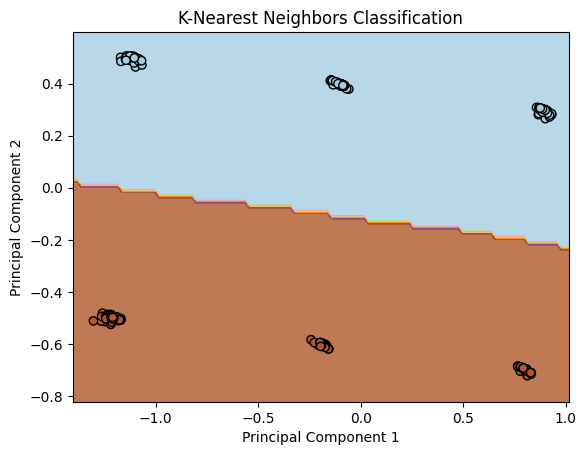

In [26]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_pca, y)

h=0.02
x_min, x_max = x_pca[:, 0].min() - 0.1, x_pca[:, 0].max() + 0.1
y_min, y_max = x_pca[:, 1].min() - 0.1, x_pca[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Nearest Neighbors Classification')
plt.show()

In [29]:
neighbors = np.arange(1, 100)
accuracy_scores = []

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

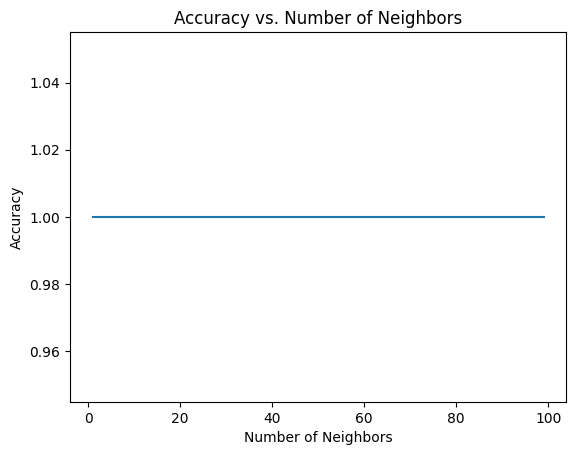

In [30]:
plt.plot(neighbors, accuracy_scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.show()

## **Experimenting and Improving**

In [31]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [33]:
k = 1
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0
